<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Logistic_Regression_(Weather_USA_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
data = 'weatherAUS.csv'
df = pd.read_csv(data)

In [5]:
df.shape

(145460, 23)

In [6]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df.isna().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [8]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,6/25/2017,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [10]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [11]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print(f"categorical Columns are : {categorical}")

categorical Columns are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,W,W,WNW,No,No
1,12/2/2008,Albury,WNW,NNW,WSW,No,No
2,12/3/2008,Albury,WSW,W,WSW,No,No
3,12/4/2008,Albury,NE,SE,E,No,No
4,12/5/2008,Albury,W,ENE,NW,No,No


In [13]:
cat1 = [var for var in categorical if df[var].isna().sum() != 0]
# print(df[cat1])
print(df[cat1].isna().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


In [14]:
for i in categorical:
  print(df[i].value_counts()/float(len(df)))

Date
6/24/2017    0.000337
6/23/2017    0.000337
6/22/2017    0.000337
6/21/2017    0.000337
6/20/2017    0.000337
               ...   
1/27/2008    0.000007
1/28/2008    0.000007
1/29/2008    0.000007
1/30/2008    0.000007
1/31/2008    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.023622
Sydney              0.022989
Adelaide            0.021951
Darwin              0.021951
Hobart              0.021951
Perth               0.021951
Melbourne           0.021951
Brisbane            0.021951
Albury              0.020899
MountGinini         0.020899
GoldCoast           0.020899
Wollongong          0.020899
MountGambier        0.020899
Launceston          0.020899
AliceSprings        0.020899
Albany              0.020899
Townsville          0.020899
Bendigo             0.020899
Cairns              0.020899
Ballarat            0.020899
Penrith             0.020892
Newcastle           0.020892
Tuggeranong         0.020892
PerthAirport        0.020686
Willia

In [15]:
for i in categorical:
  print(i ,"contains --> ", len(df[i].unique()))

Date contains -->  3436
Location contains -->  49
WindGustDir contains -->  17
WindDir9am contains -->  17
WindDir3pm contains -->  17
RainToday contains -->  3
RainTomorrow contains -->  3


In [16]:
for i in cat1:
  print(i ,"contains --> ", len(df[i].unique()))

WindGustDir contains -->  17
WindDir9am contains -->  17
WindDir3pm contains -->  17
RainToday contains -->  3
RainTomorrow contains -->  3


In [17]:
df['Date'].dtypes

dtype('O')

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df['Year'] = df['Date'].dt.year
df['Year'].head()

,Year
0,2008
1,2008
2,2008
3,2008
4,2008


In [20]:
df['Month'] = df['Date'].dt.month
df['Month'].head()

,Month
0,12
1,12
2,12
3,12
4,12


In [21]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month'],
      dtype='object')

In [22]:
df['Day'] = df['Date'].dt.day
df['Day'].head()

,Day
0,1
1,2
2,3
3,4
4,5


In [23]:
df['Date'].head()

,Date
0,2008-12-01
1,2008-12-02
2,2008-12-03
3,2008-12-04
4,2008-12-05


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [25]:
df.drop('Date' , inplace=True , axis=1)

In [26]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [27]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print(categorical)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [28]:
df[categorical].isna().sum()

,0
Location,0
WindGustDir,10326
WindDir9am,10566
WindDir3pm,4228
RainToday,3261
RainTomorrow,3267


In [29]:
print(len(df['Location'].unique()))

49


In [30]:
print((df['Location'].unique()))

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [31]:
df.Location.value_counts()

,count
Location,
Canberra,3436
Sydney,3344
Adelaide,3193
Darwin,3193
Hobart,3193
Perth,3193
Melbourne,3193
Brisbane,3193
Albury,3040


In [32]:
pd.get_dummies(df['Location'] , drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
print(len(df['WindGustDir'].unique()))

17


In [34]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [35]:
df['WindGustDir'].value_counts()

,count
WindGustDir,
W,9915
SE,9418
N,9313
SSE,9216
E,9181
S,9168
WSW,9069
SW,8967
SSW,8736


In [36]:
pd.get_dummies(df['WindGustDir'] , drop_first=True,dummy_na=True).head().astype(int)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [37]:
pd.get_dummies(df['WindGustDir'] , drop_first=True,dummy_na=True).sum(axis=0).astype(int)

,0
ENE,8104
ESE,7372
N,9313
NE,7133
NNE,6548
NNW,6620
NW,8122
S,9168
SE,9418
SSE,9216


In [38]:
# pd.get_dummies(df['WindGustDir'] , drop_first=True,dummy_na=True).sum(axis=1).astype(int)

In [39]:
print(len(df['WindDir9am'].unique()))

17


In [40]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [41]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [42]:
df['WindDir9am'].value_counts()

,count
WindDir9am,
N,11758
SE,9287
E,9176
SSE,9112
NW,8749
S,8659
W,8459
SW,8423
NNE,8129


In [43]:
pd.get_dummies(df['WindDir9am'] , drop_first=True,dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
pd.get_dummies(df['WindDir9am'] , drop_first=True,dummy_na=True).sum(axis=0)

,0
ENE,7836
ESE,7630
N,11758
NE,7671
NNE,8129
NNW,7980
NW,8749
S,8659
SE,9287
SSE,9112


In [45]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [46]:
len(df['WindDir3pm'].unique())

17

In [47]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [48]:
df['WindDir3pm'].value_counts()

,count
WindDir3pm,
SE,10838
W,10110
S,9926
WSW,9518
SSE,9399
SW,9354
N,8890
WNW,8874
NW,8610


In [49]:
pd.get_dummies(df['WindDir3pm'] , drop_first=True,dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [50]:
pd.get_dummies(df['WindDir3pm'] , drop_first=True,dummy_na=True).sum(axis=0)

,0
ENE,7857
ESE,8505
N,8890
NE,8263
NNE,6590
NNW,7870
NW,8610
S,9926
SE,10838
SSE,9399


In [51]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [52]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [53]:
# df['RainToday'].head()

In [54]:
len(df['RainToday'].unique())

3

In [55]:
df['RainToday'].value_counts()

,count
RainToday,
No,110319
Yes,31880


In [56]:
pd.get_dummies(df['RainToday'] , drop_first=True,dummy_na=True).head()

,Yes,NaN
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [57]:
pd.get_dummies(df['RainToday'] , drop_first=True,dummy_na=True).sum(axis=0)

,0
Yes,31880
NaN,3261


In [58]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print(numerical)
print(len(numerical))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']
19


In [59]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [60]:
df[numerical].isna().sum()

,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustSpeed,10263
WindSpeed9am,1767
WindSpeed3pm,3062
Humidity9am,2654
Humidity3pm,4507


In [61]:
print(round(df[numerical].describe()))

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Text(0, 0.5, 'WindSpeed3pm')

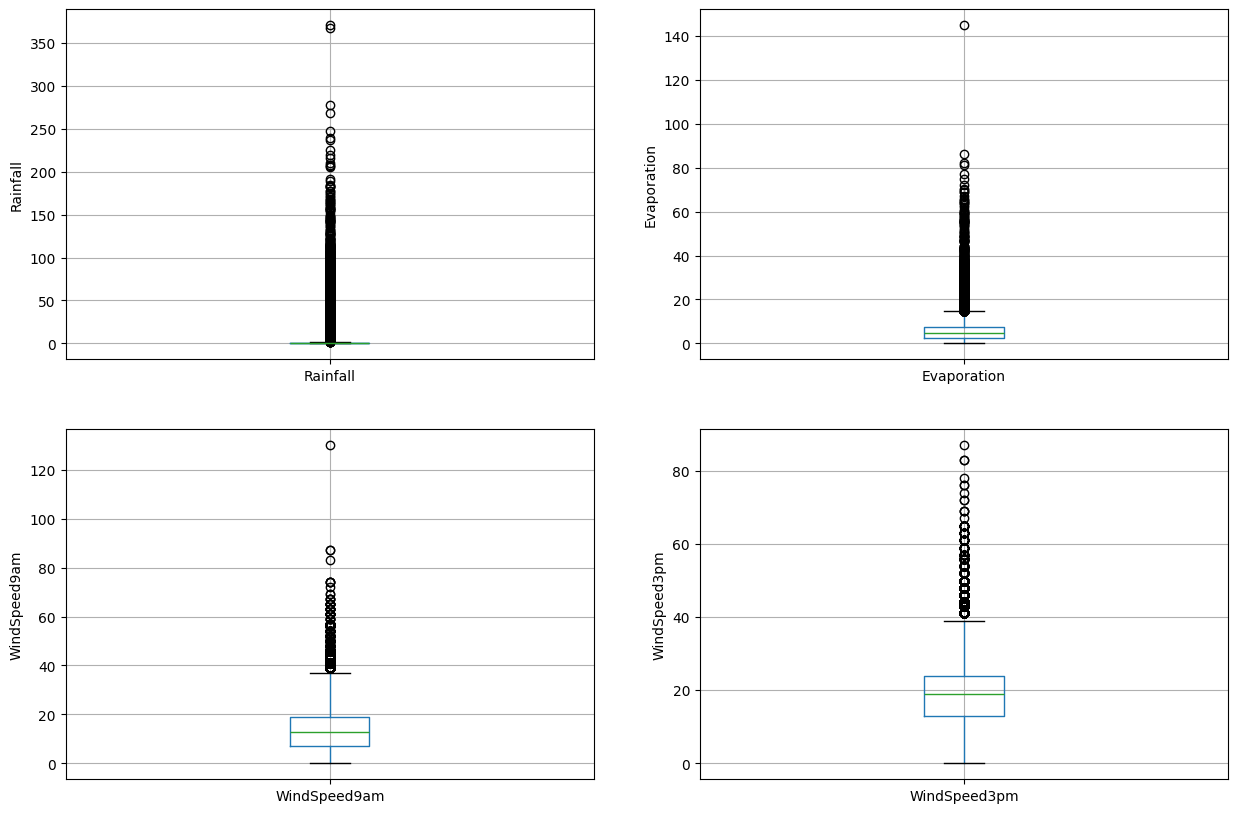

In [62]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [63]:
df.shape

(145460, 25)

Text(0, 0.5, 'WindSpeed3pm')

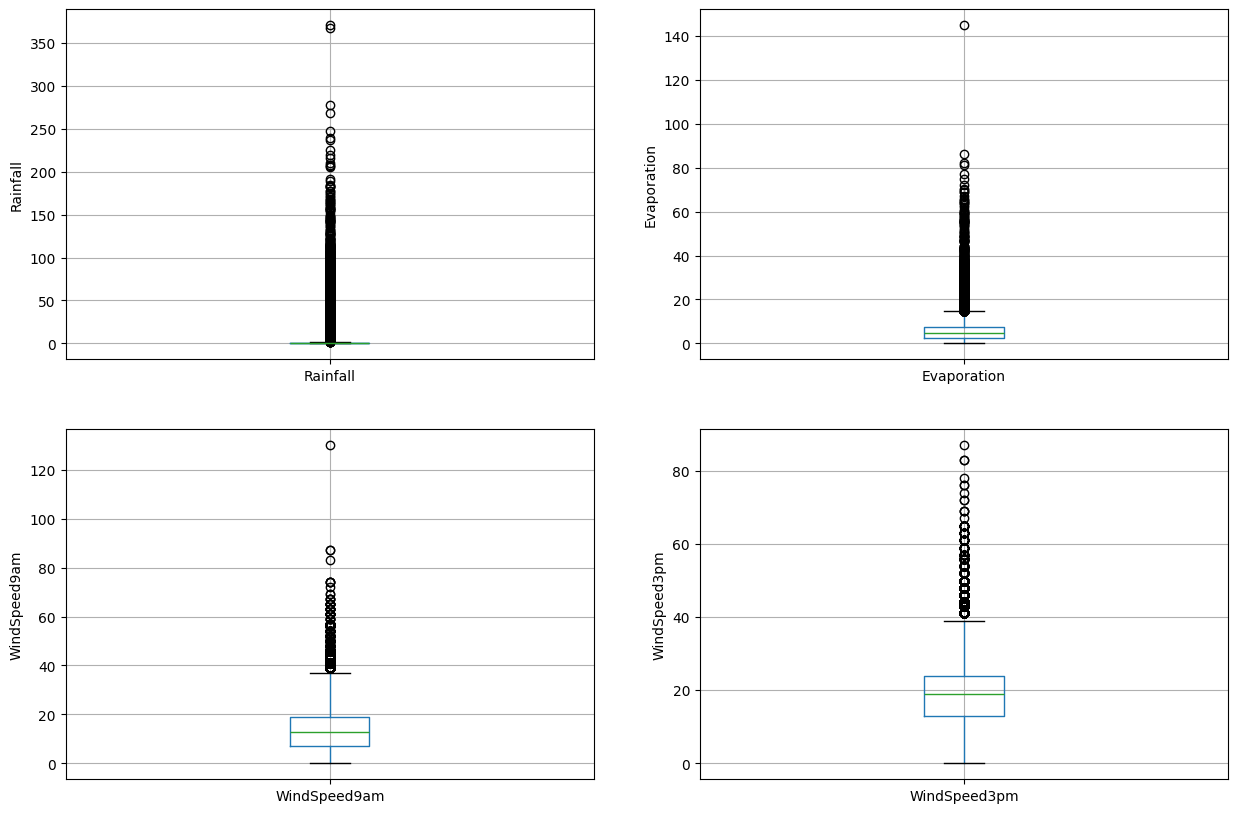

In [64]:

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [65]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerundary} or > {upperboundary}'.format(lowerundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [66]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [67]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed9am outliers are values < -29.0 or > 55.0


In [68]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -20.0 or > 57.0


In [69]:
# for var in df_clean[out].columns:
#     plt.figure(figsize=(6, 4))
#     sns.boxplot(x=df_clean[var])
#     plt.title(f'Boxplot of {var}')
#     plt.show()

In [70]:
# print(round(df[numerical].describe()))

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [72]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [73]:
x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [74]:
y = y.fillna(y.mode()[0])
y = y.replace({'No': 0, 'Yes': 1})

In [75]:
from sklearn.model_selection import train_test_split
xtrain, xtest , ytrain , ytest = train_test_split(x,y,test_size=0.2 ,random_state=0)

In [76]:
ytrain.value_counts()

,count
RainTomorrow,
0,90857
1,25511


In [77]:
xtrain.shape, xtest.shape

((116368, 24), (29092, 24))

In [78]:
df.shape

(145460, 25)

In [79]:
# df_clean.shape

In [80]:
xtrain.dtypes

,0
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object
WindDir3pm,object


In [81]:
# xtrain[numerical].isna().sum()

In [82]:
# xtest[numerical].isna().sum()

In [97]:
categorical = [col for col in xtrain.columns if xtrain[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [98]:
numerical = [col for col in xtrain.columns if xtrain[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [99]:
for col in numerical:
  if xtrain[col].isna().mean()>0:
    print(col,round(xtrain[col].isna().mean() , 4))

In [100]:
for df1 in [xtrain , xtest]:
  for col in numerical:
    colmedian = xtrain[col].median()
    df1[col].fillna(colmedian , inplace=True)

In [101]:
xtrain[numerical].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [102]:
xtest[numerical].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [103]:
# cat2 = categorical.copy()
# cat2.remove('RainTomorrow')
# print(cat2)

In [104]:
xtrain[categorical].isna().mean()

,0
Location,0.0
WindGustDir,0.0
WindDir9am,0.0
WindDir3pm,0.0
RainToday,0.0


In [105]:
for s in [xtrain , xtest]:
  s['WindGustDir'].fillna(xtrain['WindGustDir'].mode()[0] ,inplace=True)
  s['WindDir9am'].fillna(xtrain['WindDir9am'].mode()[0] ,inplace=True)
  s['WindDir3pm'].fillna(xtrain['WindDir3pm'].mode()[0] ,inplace=True)
  s['RainToday'].fillna(xtrain['RainToday'].mode()[0] ,inplace=True)

In [106]:
xtrain[categorical].isna().sum()

,0
Location,0
WindGustDir,0
WindDir9am,0
WindDir3pm,0
RainToday,0


In [107]:
xtrain.isna().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [108]:
xtrain.shape

(116368, 24)

In [111]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])  # df3["rainfalll"]= 3

for df3 in [xtrain, xtest]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [112]:

# cap_columns = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']


# capping_dict = {}

# for var in cap_columns:
#     Q1 = xtrain[var].quantile(0.25)
#     Q3 = xtrain[var].quantile(0.75)
#     IQR = Q3 - Q1
#     top = Q3 + 3 * IQR
#     capping_dict[var] = top

In [113]:
# def max_value(df, variable, tp):
#     return np.where(df[variable] > tp, tp, df[variable])

# for df in [xtrain, xtest]:
#     for var in cap_columns:
#         df[var] = max_value(df, var, capping_dict[var])

In [114]:
# cap_outliers_using_iqr(dfc,cols)

In [115]:
# dfc['Rainfall'].max()

In [116]:
xtrain.Rainfall.max(), xtest.Rainfall.max()

(3.2, 3.2)

In [117]:
xtrain.Evaporation.max(), xtest.Evaporation.max()

(21.8, 21.8)

In [118]:
xtrain[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190189,23.203107,0.670800,5.093362,7.982476,39.982091,14.029381,18.687466,68.950691,51.605828,1017.639891,1015.244946,4.664092,4.710728,16.979454,21.657195,2012.767058,6.395091,15.731954
std,6.366893,7.085408,1.181512,2.800200,2.761639,13.127953,8.835596,8.700618,18.811437,20.439999,6.728234,6.661517,2.280687,2.106040,6.449641,6.848293,2.538401,3.425451,8.796931
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,31.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [119]:
xtrain[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
22926,NorfolkIsland,ESE,ESE,ESE,No
80735,Watsonia,NE,NNW,NNE,No
121764,Perth,SW,N,SW,Yes
139821,Darwin,ESE,ESE,E,No
1867,Albury,E,ESE,E,Yes


In [120]:
# xtrain['Evaporation'].max()

In [121]:
# xtrain[numerical].describe()

In [122]:
# cat2

In [123]:
# xtrain[cat2].head()

In [124]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [125]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols='RainToday')
xtrain = encoder.fit_transform(xtrain)
xtest = encoder.transform(xtest)

In [126]:
xtrain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,...,1013.9,5.0,7.0,21.4,22.2,0,1,2014,3,12
80735,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,...,1014.6,3.0,5.0,14.3,23.2,0,1,2016,10,6
121764,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,N,SW,...,1014.9,1.0,2.0,16.6,21.5,1,0,2011,8,31
139821,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,E,...,1012.1,1.0,1.0,23.2,29.1,0,1,2010,6,11
1867,Albury,15.7,17.6,3.2,4.7,8.4,E,20.0,ESE,E,...,1010.5,8.0,8.0,16.5,17.3,1,0,2014,4,10


In [127]:
xtrain.shape

(116368, 25)

In [128]:
# xtrain[numerical].columns

In [129]:
# xtrain[numerical].head()

In [130]:
# xtrain.columns

In [131]:
xtrain = pd.concat([
    xtrain[numerical],
    xtrain[['RainToday_0', 'RainToday_1']],
    pd.get_dummies(xtrain['Location'], drop_first=True),
    pd.get_dummies(xtrain['WindGustDir'], drop_first=True),
    pd.get_dummies(xtrain['WindDir9am'], drop_first=True),
    pd.get_dummies(xtrain['WindDir3pm'], drop_first=True)
], axis=1)


In [132]:
xtest = pd.concat([
    xtest[numerical],
    xtest[['RainToday_0', 'RainToday_1']],
    pd.get_dummies(xtest['Location'], drop_first=True),
    pd.get_dummies(xtest['WindGustDir'], drop_first=True),
    pd.get_dummies(xtest['WindDir9am'], drop_first=True),
    pd.get_dummies(xtest['WindDir3pm'], drop_first=True)
], axis=1)


In [133]:
xtrain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190189,23.203107,0.670800,5.093362,7.982476,39.982091,14.029381,18.687466,68.950691,51.605828,...,1015.244946,4.664092,4.710728,16.979454,21.657195,2012.767058,6.395091,15.731954,0.219648,0.780352
std,6.366893,7.085408,1.181512,2.800200,2.761639,13.127953,8.835596,8.700618,18.811437,20.439999,...,6.661517,2.280687,2.106040,6.449641,6.848293,2.538401,3.425451,8.796931,0.414010,0.414010
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000,0.000000,1.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000,0.000000,1.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,...,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000,0.000000,1.000000
max,31.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000,1.000000,1.000000


In [134]:
from sklearn.preprocessing import MinMaxScaler
cols = xtrain.columns
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [135]:
xtrain = pd.DataFrame(xtrain, columns=[cols])
xtest = pd.DataFrame(xtest, columns=[cols])

In [136]:
xtrain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.512133,0.529359,0.209625,0.233640,0.550516,0.263427,0.255080,0.327850,0.689507,0.516058,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,0.157596,0.133940,0.369223,0.128450,0.190458,0.101767,0.160647,0.152642,0.188114,0.204400,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400990,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507426,0.517958,0.000000,0.215596,0.579310,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.626238,0.623819,0.187500,0.238532,0.593103,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
xtrain.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.675743,0.538752,0.0625,0.229358,0.503448,0.356589,0.563636,0.491228,0.74,0.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.440594,0.544423,0.0625,0.073394,0.751724,0.325581,0.236364,0.421053,0.74,0.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.480198,0.510397,0.4375,0.055046,0.662069,0.155039,0.000000,0.192982,0.85,0.47,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.688119,0.655955,0.0000,0.422018,0.758621,0.286822,0.472727,0.298246,0.44,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.599010,0.423440,1.0000,0.215596,0.579310,0.108527,0.200000,0.228070,1.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
print(y.shape)
ytrain.isna().sum()


(145460,)


np.int64(0)

In [139]:
y.head()

,RainTomorrow
0,0
1,0
2,0
3,0
4,0


In [140]:
y.value_counts()

,count
RainTomorrow,
0,113583
1,31877


In [141]:
# ytrain = ytrain.fillna(ytrain.mode()[0])

In [142]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear' , random_state=0)
logreg.fit(xtrain,ytrain)

LogisticRegression(random_state=0, solver='liblinear')

In [143]:
ypredtest = logreg.predict(xtest)
ypredtest

array([0, 0, 0, ..., 1, 0, 0])

In [144]:
logreg.predict_proba(xtest)[:,0]

array([0.83181736, 0.74621395, 0.79864342, ..., 0.41921397, 0.65506099,
       0.96957946])

In [145]:
logreg.predict_proba(xtest)[:,1]

array([0.16818264, 0.25378605, 0.20135658, ..., 0.58078603, 0.34493901,
       0.03042054])

In [146]:
# ypredtest = pd.Series(ypredtest)

In [147]:
# # if not isinstance(ypredtest, pd.Series):
#     ypredtest = pd.Series(ypredtest)

# # عرض القيم الفريدة للتأكد
# print("ypredtest values:", ypredtest.unique())
# print("ytest values:", ytest.unique())

In [148]:
# ytest.dtypes

In [149]:
# ytest.value_counts()

In [150]:
# ytest.unique()

In [151]:
# ytest.info()

In [152]:
# ytest = ytest.replace({'Yes': 1, 'No': 0})

In [153]:
# ypredtest = ypredtest.replace({'Yes': 1, 'No': 0}).astype(int)


In [154]:
# print(len(ytest), len(ypredtest))  # يجب أن يكونوا متساويين


In [155]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, ypredtest)))

Model accuracy score: 0.8483


In [156]:
ypredtrain = logreg.predict(xtrain)
ypredtrain

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
acc = accuracy_score(ytest, ypredtest)
print(f"Accuracy Test : {acc:.4f}")

acct = accuracy_score(ytrain, ypredtrain)
print(f"Accuracy Train: {acct:.4f}")

Accuracy Test : 0.8483
Accuracy Train: 0.8488


In [158]:
# ytest.isna().sum()

In [159]:
# ytest.dropna(inplace=True)

In [160]:
# ytest.isna().sum()

In [161]:
# ytest = ytest.astype(int)

In [162]:
# ytest.unique()

In [163]:
# print(x.shape)  # عدد العينات والمميزات
# print(y.shape)

In [164]:
# mask = ytest.notnull() & ypredtest.notnull()
# y_test_filtered = ytest[mask]
# y_pred_filtered = ypredtest[mask]

# print(len(y_test_filtered), len(y_pred_filtered))

In [165]:
# accuracy_score(y_test_filtered, y_pred_filtered)

In [166]:
# xtest.dtypes

In [167]:
# xtest.info()

In [168]:
# xtest.unique()

In [169]:
print('Training set score: {:.4f}'.format(logreg.score(xtrain, ytrain)))

print('Test set score: {:.4f}'.format(logreg.score(xtest, ytest)))

Training set score: 0.8488
Test set score: 0.8483


In [170]:
logreg001 = LogisticRegression(C=0.01 , solver= "liblinear" ,random_state=0)

logreg001.fit(xtrain,ytrain)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [171]:
print('Training set score: {:.4f}'.format(logreg001.score(xtrain, ytrain)))

print('Test set score: {:.4f}'.format(logreg001.score(xtest, ytest)))

Training set score: 0.8424
Test set score: 0.8416


In [172]:
ytest.value_counts()

,count
RainTomorrow,
0,22726
1,6366


In [173]:
null_accuracy = (22726 / (22726+6366))

In [174]:
print("NUll Accuracy Score is :{}".format(null_accuracy))

NUll Accuracy Score is :0.7811769558641551


In [175]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypredtest)
print(cm)

[[21542  1184]
 [ 3228  3138]]


<Axes: >

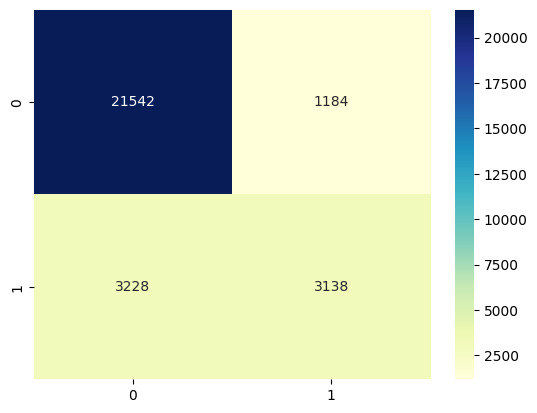

In [176]:
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix,annot=True , fmt='d' , cmap='YlGnBu')

In [177]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypredtest))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22726
           1       0.73      0.49      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092

